# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [108]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from warnings import filterwarnings
from pandas.plotting import scatter_matrix

# K-means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Hierarchical
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

#PCA
from sklearn.decomposition import PCA

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Wholesale_Data.csv to Wholesale_Data (2).csv


In [4]:
df = pd.read_csv("Wholesale_Data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
# Checking for nulls
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# getting details of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# description of the df, to understand overall outliers. eg. min values and max values
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Loop through each column to see values distribution
for col in df.columns:
    # Get the value counts for the current column
    value_counts = df[col].value_counts()

    # Print the column name and its value counts
    print(value_counts)

This does not give proper outline of the data. Need to use vizualisation.

In [9]:
# Getting an overview of how the Channel is distributed between Regions
counts = df.groupby(['Region', 'Channel']).size()
print(counts)

Region  Channel
1       1           59
        2           18
2       1           28
        2           19
3       1          211
        2          105
dtype: int64


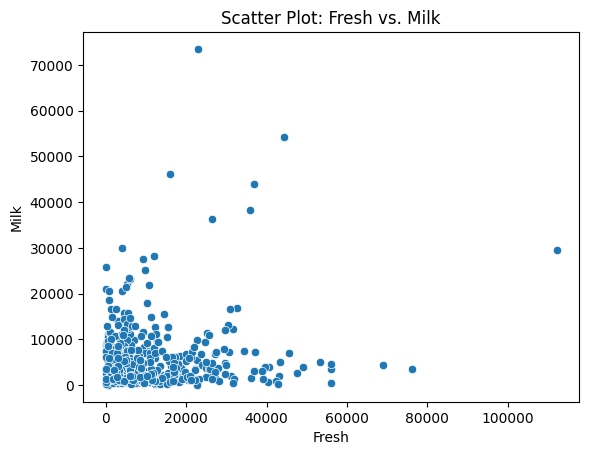

In [10]:
# Scatter Plot between "Fresh" and "Milk" variables
sns.scatterplot(x='Fresh', y='Milk', data=df)
plt.title('Scatter Plot: Fresh vs. Milk')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

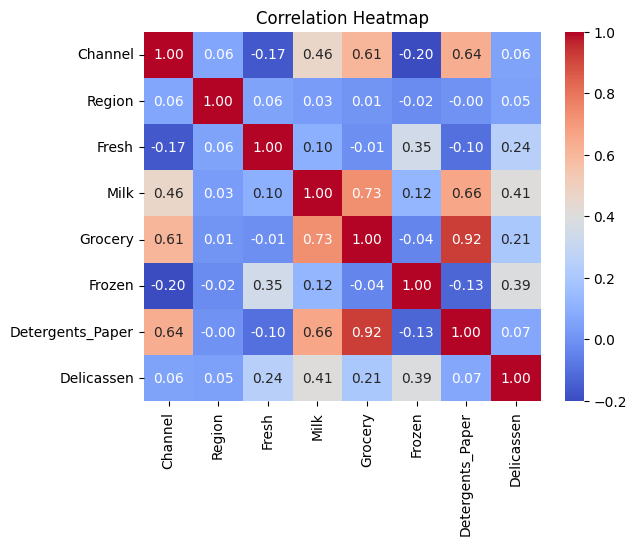

In [11]:
# Heatmap to visualize correlations between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

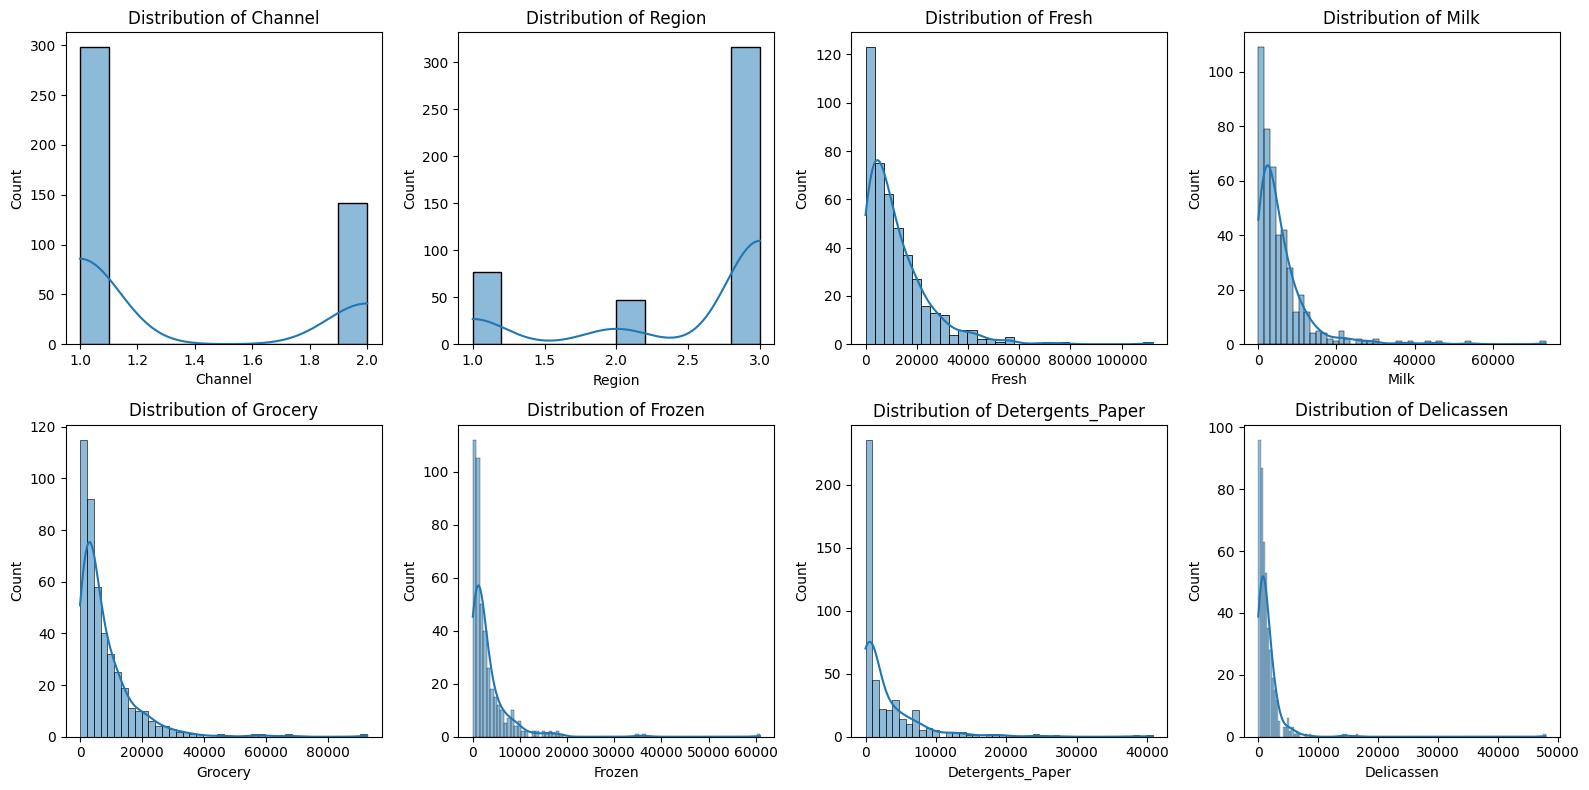

In [12]:
# Distribution of each variable

plt.figure(figsize=(16, 8))

for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

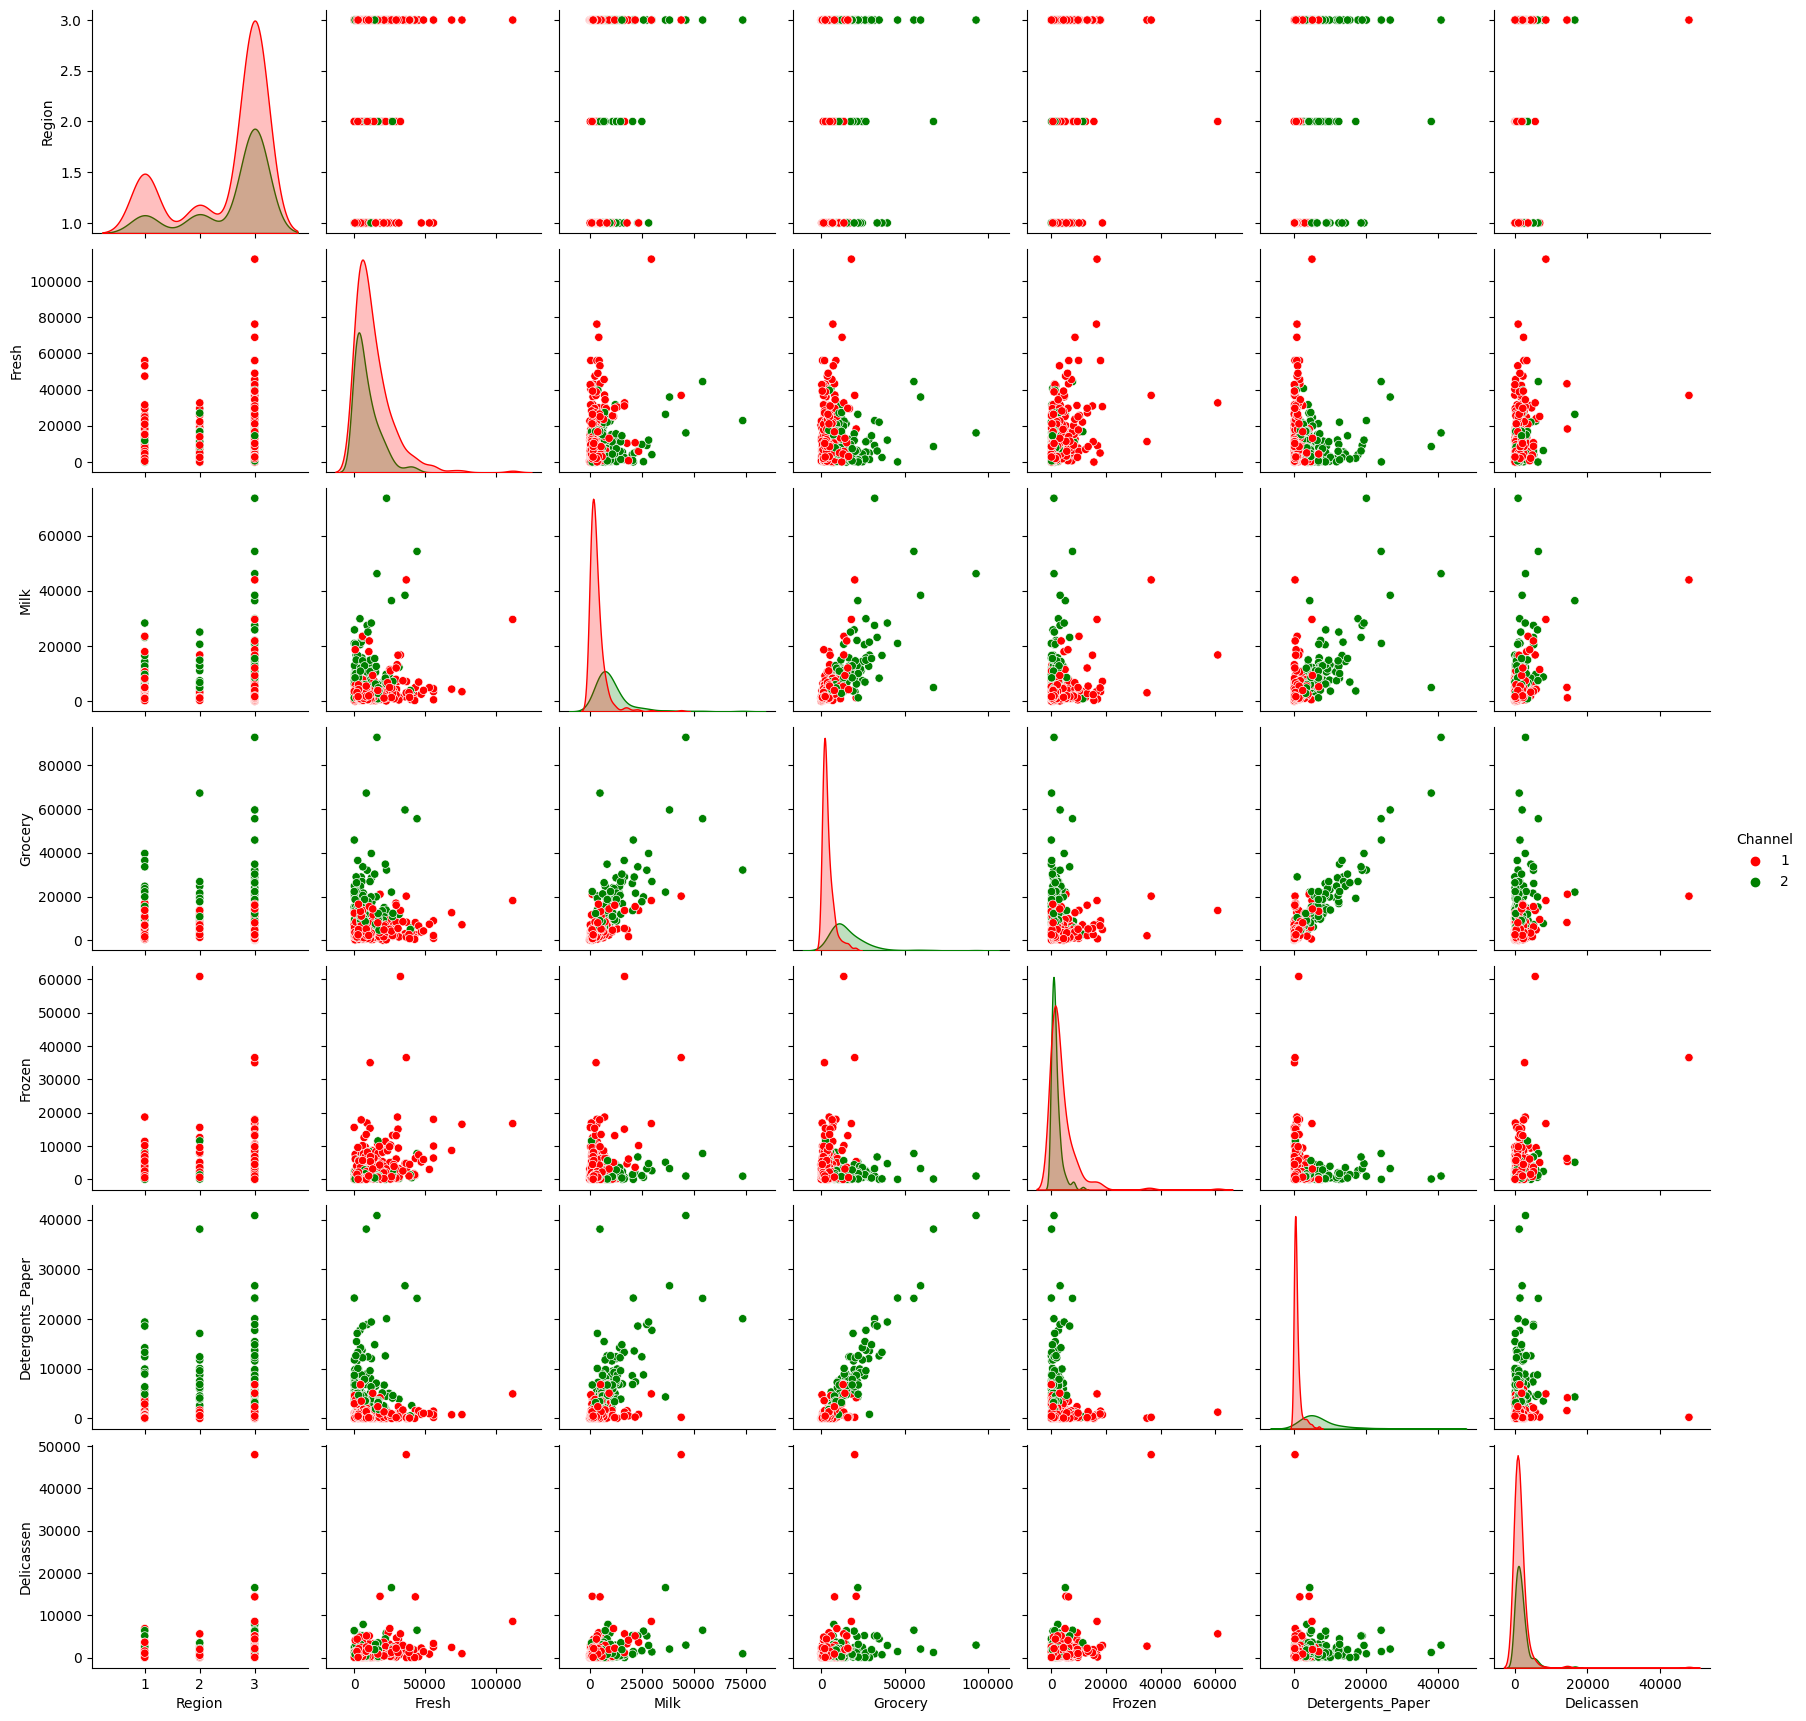

In [13]:
sns.pairplot(df, hue='Channel', palette={1: 'red', 2: 'green'})
plt.show()

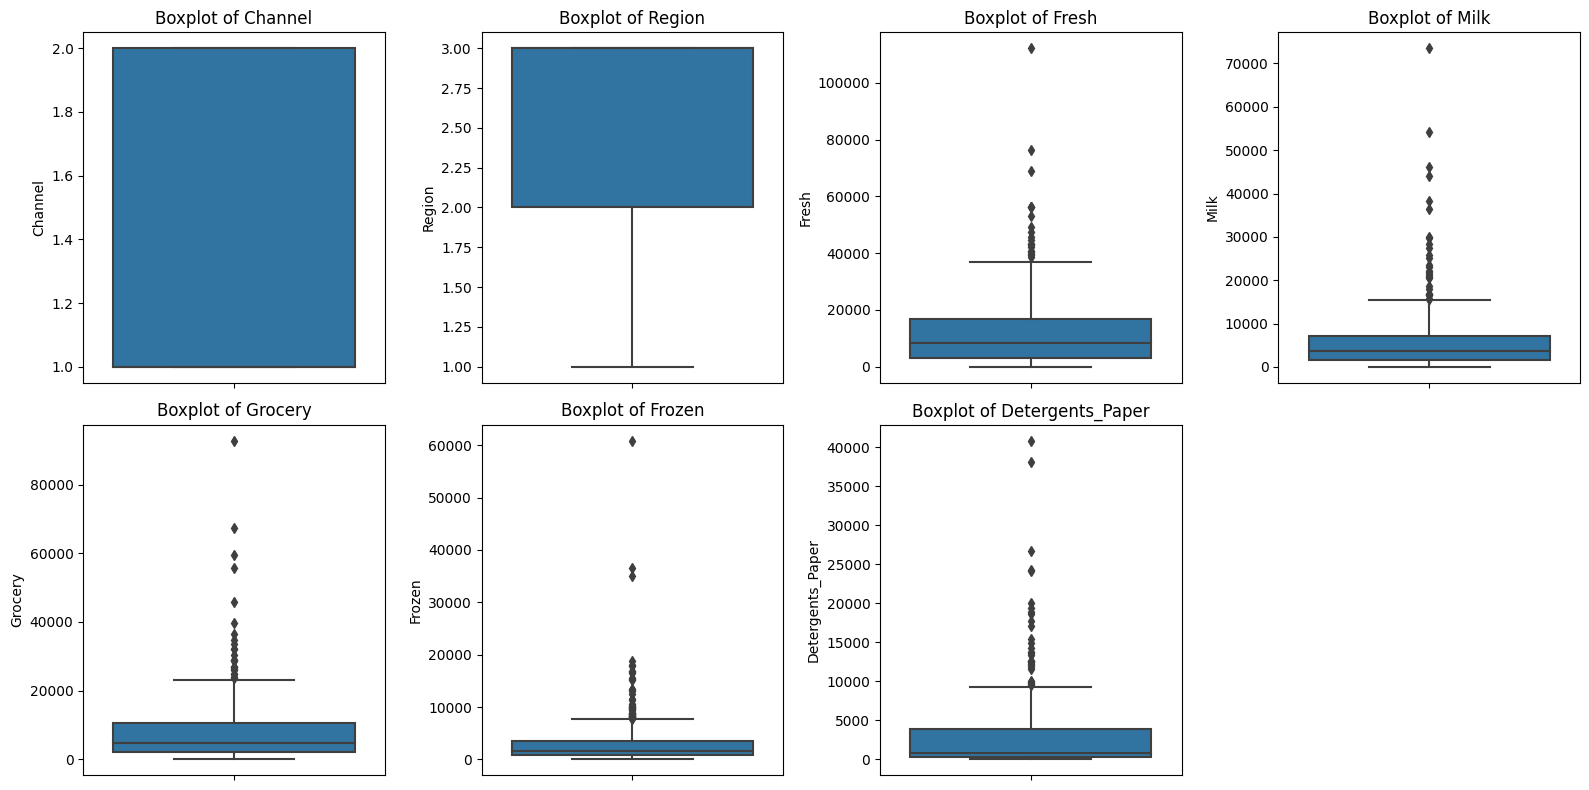

In [14]:
# Outlier detection

plt.figure(figsize=(16,8))
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

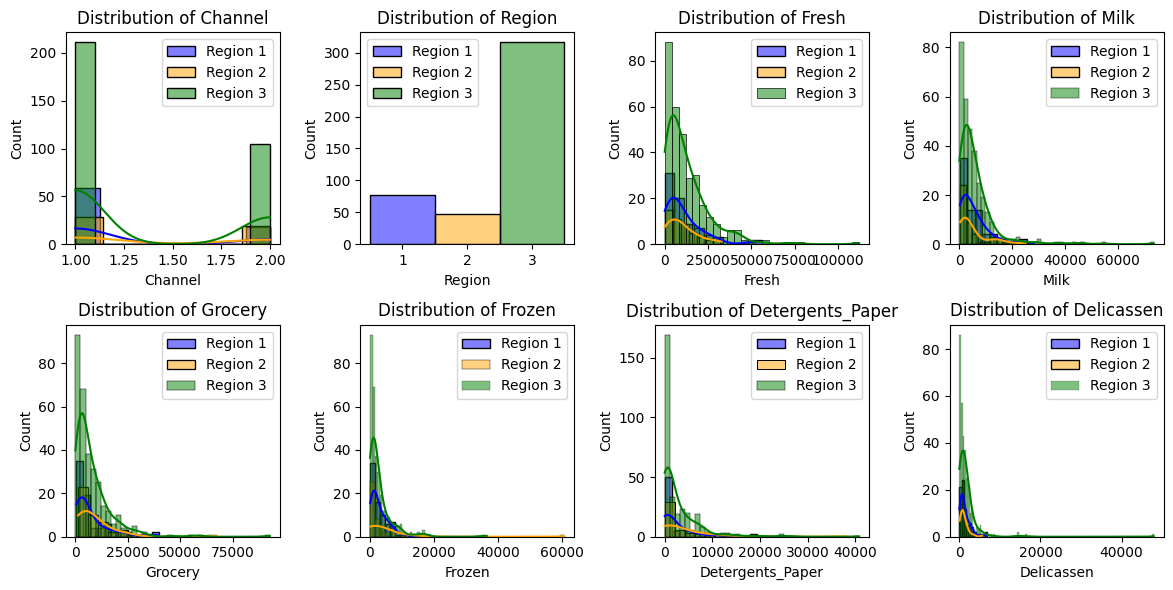

In [15]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[df['Region'] == 1][col], kde=True, label='Region 1', color='blue')
    sns.histplot(df[df['Region'] == 2][col], kde=True, label='Region 2', color='orange')
    sns.histplot(df[df['Region'] == 3][col], kde=True, label='Region 3', color='Green')
    plt.title(f"Distribution of {col}")
    plt.legend()
plt.tight_layout()
plt.show()

It seems Overall higer byuing has been done from the region 3 and region 2 has lower byuing.

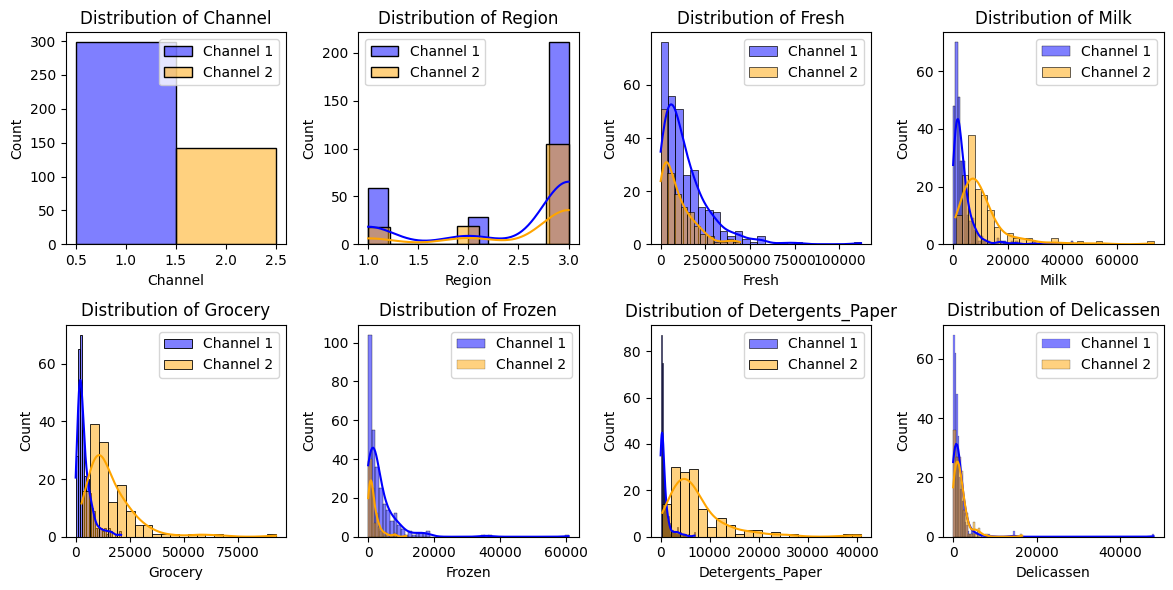

In [16]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[df['Channel'] == 1][col], kde=True, label='Channel 1', color='blue')
    sns.histplot(df[df['Channel'] == 2][col], kde=True, label='Channel 2', color='orange')
    plt.title(f"Distribution of {col}")
    plt.legend()
plt.tight_layout()
plt.show()

#### Outliers Cleaning

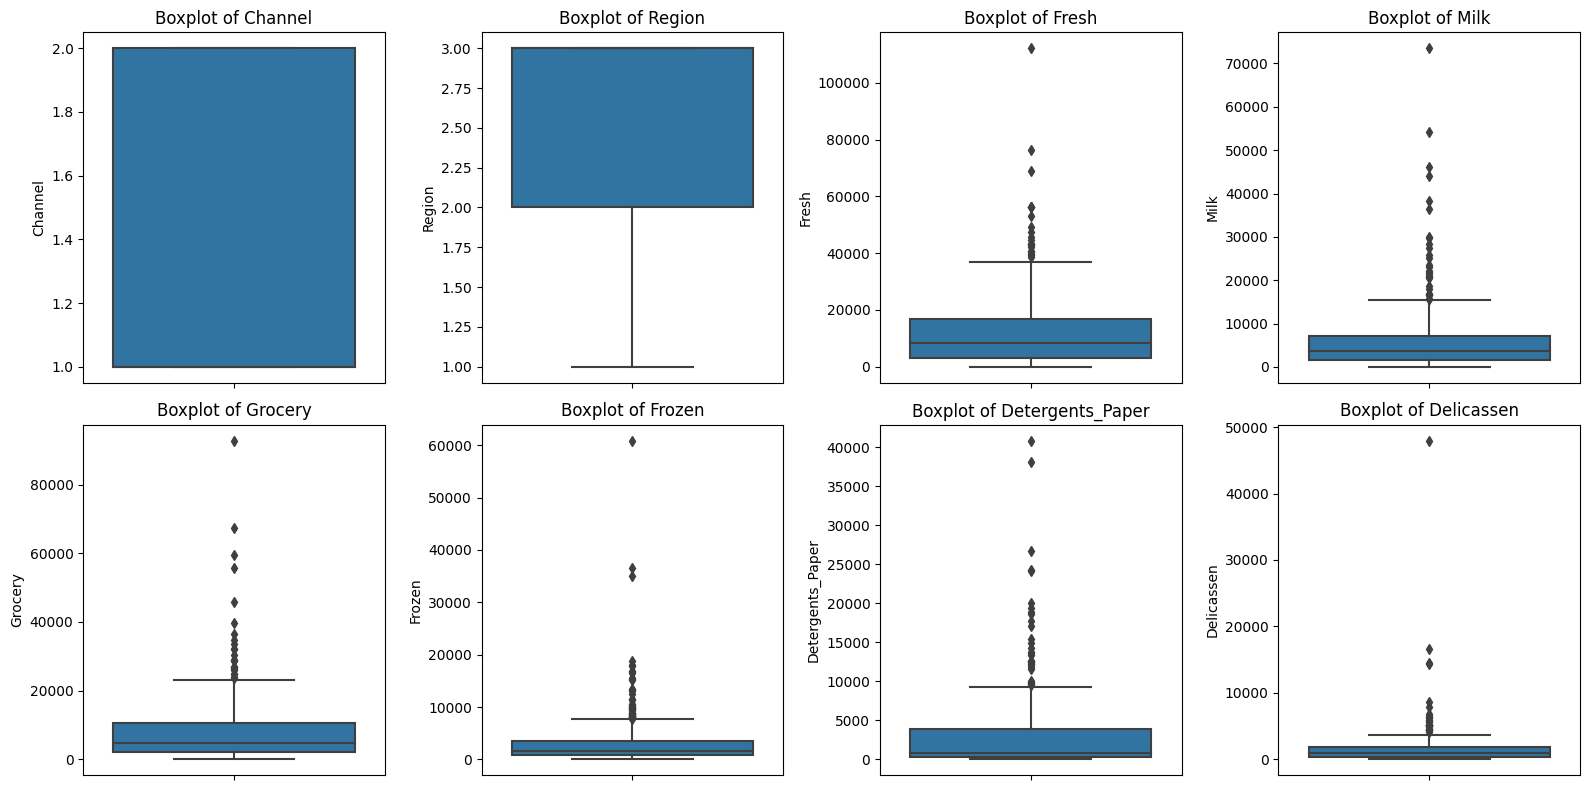

In [17]:
# Outlier detection

plt.figure(figsize=(16,8))
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [109]:
# REmoving outlier
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df[col] < (Q1 - 1 * IQR)) | (df[col] > (Q3 + 1 * IQR)))]

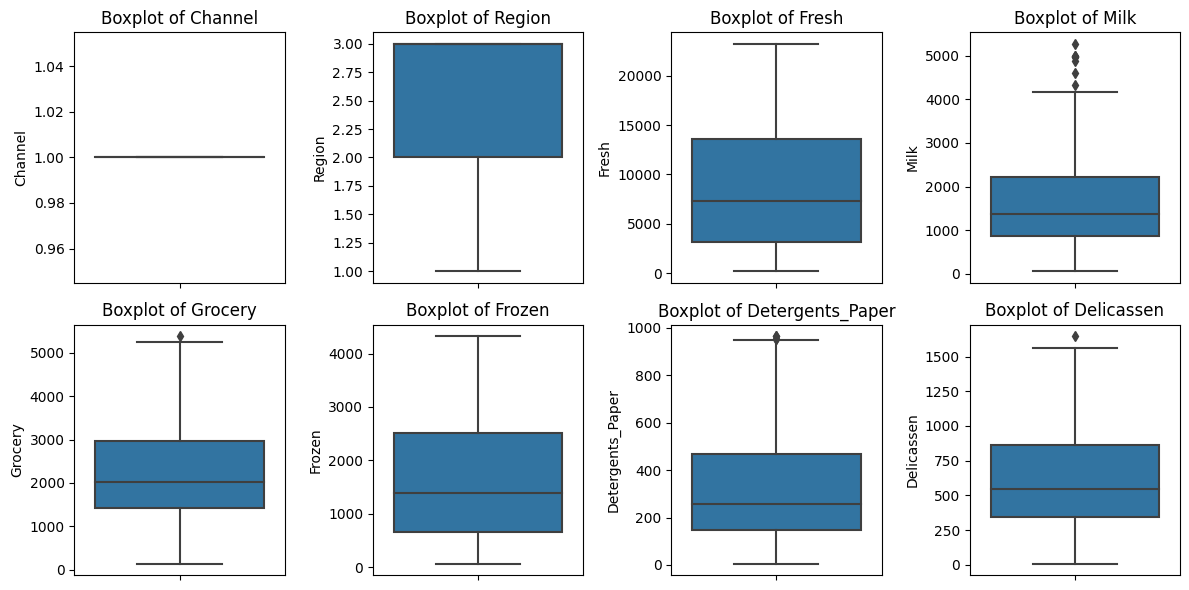

In [23]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

There are several Hypothesis we can work on;
1. Customer Segmentation based on Purchasing Behavior
2. Channel and Regional Differences in Purchasing Habits
3. Impact of Channel and Region on Expenditure, etc.

We will be working towards 1st hypothesis;
- Hypothesis: Different customer segments can be identified based on their purchasing behavior in the 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen' categories.

In [88]:
# Select the features for clustering
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[features]

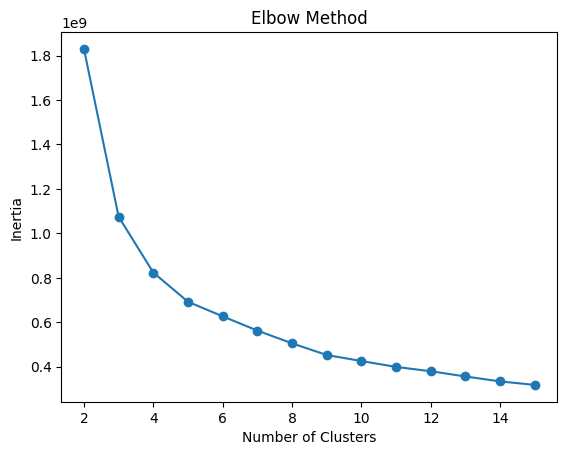

In [89]:
# Determining the optimal number of clusters
# Iterate over the range of clusters from 2 to 15 and calculate the inertia for each cluster
inertia_values = []
for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia values to determine the optimal number of clusters
plt.plot(range(2, 16), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [90]:
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Labels'] = kmeans.fit_predict(data_for_clustering)

# Check the distribution of data points in each cluster
print(df['Cluster_Labels'].value_counts())

0    48
2    42
1    31
Name: Cluster_Labels, dtype: int64


In [91]:
print('SSE: ', kmeans.inertia_)
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  1074854303.347734

Centroids: 
 [[ 8640.875       1593.70833333  2275.          1719.22916667
    315.1875       560.41666667]
 [17429.06451613  1633.38709677  2203.83870968  1877.83870968
    367.90322581   680.09677419]
 [ 2183.33333333  1885.83333333  2109.14285714  1362.64285714
    320.73809524   633.0952381 ]]


- SSE (Sum of Squared Errors): The SSE value of approximately 1,074,854,303.35 indicates that the data points are relatively spread out from their respective centroids, suggesting some overlap or dispersion within the clusters.

- Centroids: The centroid matrix represents the average feature values for each cluster obtained from K-means clustering. The first column with the value '0' seems to be related to the cluster label.

- The output shows the result of K-means clustering with relatively high SSE, which might indicate some suboptimal separation of the clusters. However, it provides insight into the average feature values for each cluster, allowing further analysis and interpretation of the customer segments.

To overcome the issue of relatively high SSE and potential suboptimal separation of clusters in K-means clustering, I can scale the data.

- Standardization

In [93]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to scale it
scaled_data = scaler.fit_transform(data_for_clustering)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_for_clustering.columns)

scaled_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.257060,-0.478435,1.369520,-1.119933,2.466625,-0.523271
1,-0.494833,-0.675061,-0.159767,1.578916,0.172833,-0.121160
2,0.200098,-0.602236,0.558854,1.369226,-0.345120,0.555000
3,0.902572,-0.730084,0.714232,-1.040395,-0.898122,-0.251782
4,-0.968979,2.131109,0.788543,0.408451,1.905834,0.944304


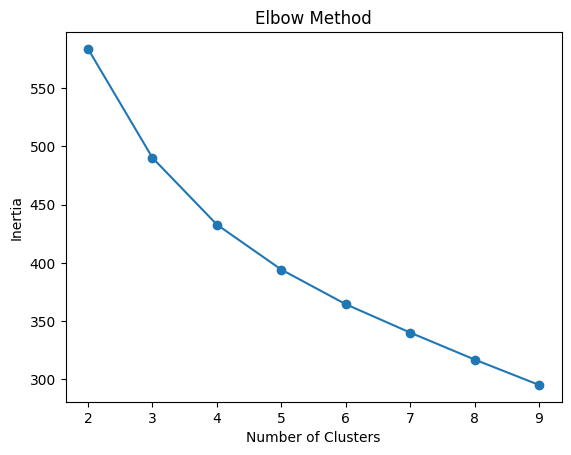

In [94]:
# Determining the optimal number of clusters with scalled data
# Iterate over the range of clusters from 2 to 10 and calculate the inertia for each cluster
inertia_values = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia values to determine the optimal number of clusters
plt.plot(range(2, 10), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [95]:
# Perform K-means clustering with K=3 using the scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Labels'] = kmeans.fit_predict(scaled_df)

# Check the distribution of data points in each cluster
print(df['Cluster_Labels'].value_counts())

2    47
0    46
1    28
Name: Cluster_Labels, dtype: int64


In [96]:
print('SSE: ', kmeans.inertia_)
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  490.0694889872906

Centroids: 
 [[-0.47266974 -0.47007933 -0.49010997 -0.62750016 -0.33919332 -0.68317924]
 [-0.15543045  1.39543746  0.61413503 -0.38124188  0.84016365  0.30043369]
 [ 0.5552098  -0.3712468   0.11381442  0.84127192 -0.16854658  0.48966174]]



- SSE (Sum of Squared Errors): The SSE value of approximately 490.07 indicates that the data points are relatively close to their respective centroids, suggesting well-separated clusters with less variation within each cluster.

- Centroids: The centroid matrix represents the average standardized feature values for each cluster obtained from K-means clustering. Each row in the centroid matrix represents a cluster's centroid, with each value representing the standardized feature's average within that cluster.

The output shows the result of K-means clustering with well-defined clusters and provides insight into the average standardized feature values for each cluster, allowing further analysis and interpretation of the customer segments.

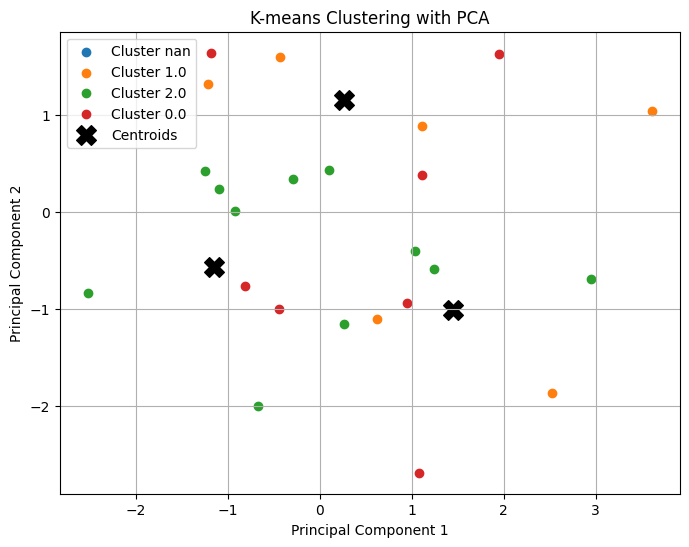

In [97]:
# Apply PCA to reduce data to two dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Add the cluster labels to the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster_Labels'] = df['Cluster_Labels']

# Create a scatter plot for the clusters
plt.figure(figsize=(8, 6))
for cluster_label in reduced_df['Cluster_Labels'].unique():
    cluster_data = reduced_df[reduced_df['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

# Plot the centroids
centroids = kmeans.cluster_centers_
reduced_centroids = pca.transform(centroids)
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], marker='X', s=200, c='black', label='Centroids')

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.legend()
plt.grid(True)

plt.show()

# Part III - Hierarchical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

- Step 1: Already have the scaler data
- Step 2: Distance matrix

In [98]:
# 'scaled_data' is the standardized data
# Calculate the pairwise Euclidean distances between data points
distance_matrix = pdist(scaled_data, metric='euclidean')

# Convert the distance matrix to a squareform matrix
distance_matrix_sq = squareform(distance_matrix)

- Step 3: Creating the dendrogram

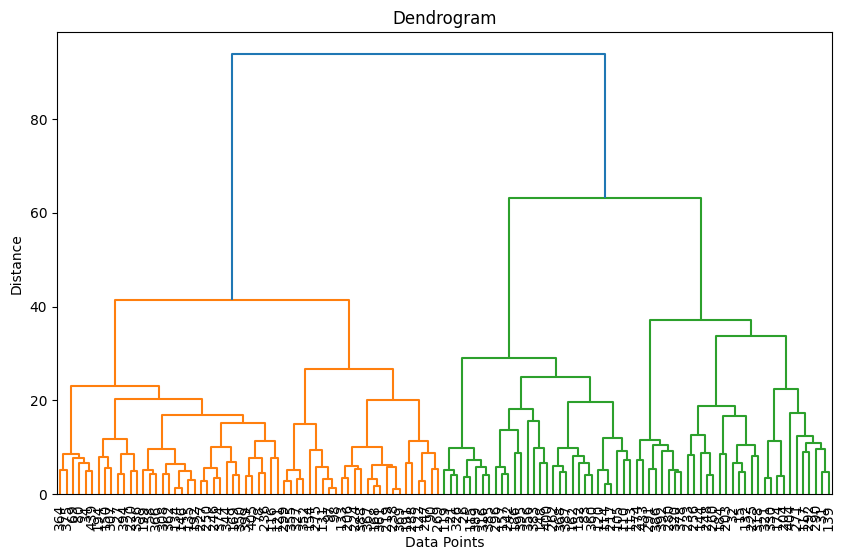

In [99]:
# Create the linkage matrix using Ward's linkage method
linkage_matrix = linkage(distance_matrix_sq, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df.index, leaf_font_size=10)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

- Step 4: Number of clusters

In [101]:
# Determine the number of clusters from the Dendogram
k_clusters = 3

# Assign data points to clusters
cluster_labels = fcluster(linkage_matrix, k_clusters, criterion='maxclust')

- Step 5: Agglomerative clustering

In [104]:
# 'k_clusters' is the desired number of clusters from the previous step
# Perform hierarchical clustering with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=k_clusters)
hierarchical_model.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = hierarchical_model.labels_

The cluster_labels obtained from Step 5 already represent the cluster assignments for each data point. I can can directly use them for further analysis or visualization. ie. PCA or t-SNE.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [105]:
# 'scaled_data' is the standardized data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

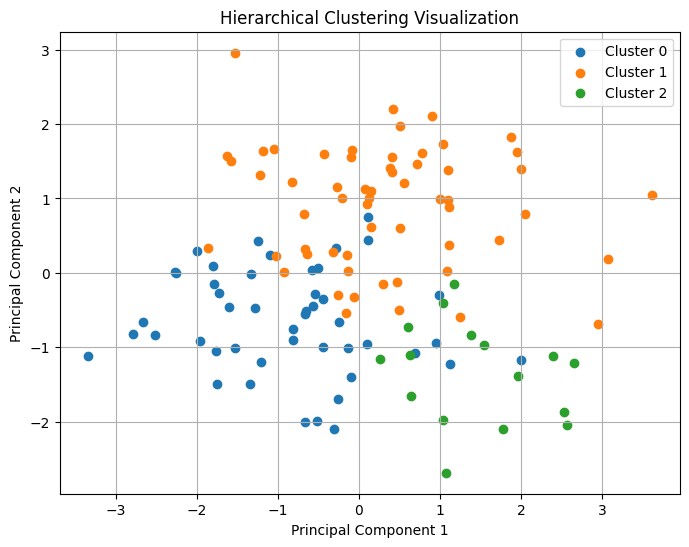

In [107]:
# 'reduced_data' is the reduced data obtained from PCA
plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = reduced_data[cluster_labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The scatter plot obtained from K-means clustering shows more scattered and disrupted data points, indicating that the clusters may not be well-defined or separated in the reduced space.

- In contrast, the hierarchical clustering diagram exhibits well-defined clusters, suggesting that the algorithm has effectively grouped similar data points together based on the similarity measure, resulting in more cohesive and distinct clusters.